<a href="https://colab.research.google.com/github/zhujunqing1996/collections-datascience-takehome-challenges/blob/main/2_Translation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df_test = pd.read_csv('test_table.csv')
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [45]:
df_test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [46]:
df_user = pd.read_csv('user_table.csv')
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [47]:
# merge the two tables
df_merged = df_test.merge(df_user, left_on = 'user_id', right_on = 'user_id', how = 'outer')
df_merged.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


# Compare the user count from different catagories

In [48]:
# plot the user count in ctrl/test group from different catagories and y=x line
def user_count_comparison(df, catagory, value = 'test'):
    ctab = pd.crosstab(df[catagory], df[value]).reset_index()
    ctab.rename(columns = {0:'#user in ctrl', 1:'#user in test'}, inplace = True)
    sns.relplot(x='#user in ctrl', y='#user in test', hue=catagory, palette = 'tab20', data=ctab);
    plt.plot([0,ctab[['#user in ctrl', '#user in test']].max().max()], [0,ctab[['#user in ctrl', '#user in test']].max().max()], linestyle = '--', color = 'black')


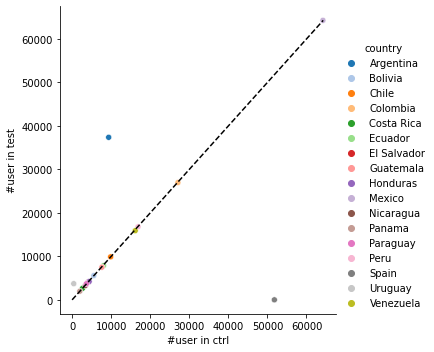

In [49]:
user_count_comparison(df = df_merged, catagory = 'country')

# Calculate the overall conversion rate of the ctrl and test group

In [50]:
def total_conversion_rate(df, ex_column = None, ex_value = None):
    if (ex_column != None) and (ex_value != None):
        print('Values {} in Column {} are excluded'.format(str(ex_value), str(ex_column)))
        for i in ex_value:
            df = df[df[ex_column] != i]
    # creat a cross table for conversion and test
    ctab = pd.crosstab(df['conversion'], df['test'])
    # calculate the conversion rate in control and test groups
    ctrl_n = ctab[0].sum()
    ctrl_rate = ctab[0][1]/ctrl_n
    ctrl_rate_moe = 1.96*np.sqrt(ctrl_rate*(1-ctrl_rate)/ctrl_n)
    print('The rates are: \nconversion rate of ctrl with 95% concident interval is ({}, {})'.format(ctrl_rate - ctrl_rate_moe, ctrl_rate + ctrl_rate_moe))
    test_n = ctab[1].sum()
    test_rate = ctab[1][1]/test_n
    test_rate_moe = 1.96*np.sqrt(test_rate*(1-test_rate)/test_n)
    print('conversion rate of test with 95% concident interval is ({}, {})\n'.format(test_rate - test_rate_moe, test_rate + test_rate_moe))

In [51]:
total_conversion_rate(df_merged)
total_conversion_rate(df_merged, ex_column = 'country', ex_value = ['Argentina', 'Spain'])


The rates are: 
conversion rate of ctrl with 95% concident interval is (0.054260076504980756, 0.0560973041083218)
conversion rate of test with 95% concident interval is (0.04256515764166115, 0.044284270322576785)

Values ['Argentina', 'Spain'] in Column country are excluded
The rates are: 
conversion rate of ctrl with 95% concident interval is (0.0490778981418143, 0.05111506440075097)
conversion rate of test with 95% concident interval is (0.04863266851380473, 0.05064731088218421)



# Compare the correlation of the columns

In [52]:
# Encode the catagorical data for correlation matrix
from sklearn.preprocessing import LabelEncoder
s = (df_merged.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)
label_encoder = LabelEncoder()
label_df_merged = df_merged.dropna()
label_df_merged[object_cols] = label_df_merged[object_cols].apply(label_encoder.fit_transform)
label_df_merged.head()

['date', 'source', 'device', 'browser_language', 'ads_channel', 'browser', 'sex', 'country']


/Users/junqingzhu/opt/anaconda3/envs/combustion/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,4,0,1,1,2,3,0,1,1,21.0,9
2,848402,4,0,1,1,1,1,0,0,1,34.0,14
3,290051,3,0,0,2,1,0,0,1,0,22.0,9
4,548435,0,0,1,1,2,2,0,1,1,19.0,9
9,10427,4,0,0,1,1,0,0,0,0,33.0,9


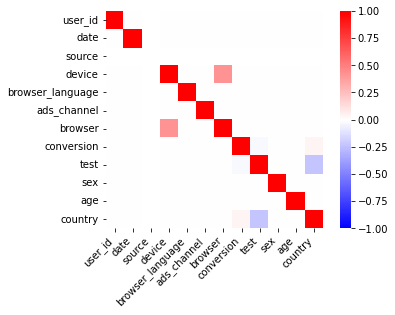

In [53]:
# plot the correlation matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
corr = label_df_merged.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, cmap = 'bwr',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

# Calculate conversion rate of the ctrl and test group from different catagories

In [54]:
def catagorical_conversion_rate(df, catagory):
    ctab = pd.crosstab(df[catagory], [df['test'], df['conversion']])
#     print(ctab)
    # calculate the conversion rate of different countries
    ctrl = ctab[0][1]/ctab[0].sum(axis = 1) # in the control group
    test = ctab[1][1]/ctab[1].sum(axis = 1) # in the test group
    df_rate=pd.DataFrame({'conversion rate in ctrl':ctrl, 'conversion rate in test':test}).reset_index()
    # df_melt = df_country_rate.melt(id_vars='country', var_name='ctrl/test', value_name='conversion rate').rename(columns=str.title)
    sns.relplot(x='conversion rate in ctrl', y='conversion rate in test', hue=catagory, palette = 'tab20', data=df_rate);
    plt.plot([0,df_rate[['conversion rate in ctrl', 'conversion rate in test']].max().max()], [0,df_rate[['conversion rate in ctrl', 'conversion rate in test']].max().max()], linestyle = '--', color = 'black')


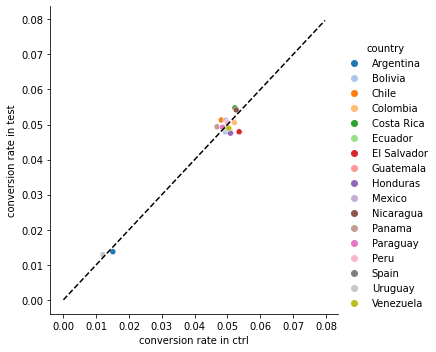

In [55]:
# catagorical_conversion_rate(df_merged[(df_merged['country'] != 'Argentina') & (df_merged['country'] != 'Spain')], catagory = 'browser')
catagorical_conversion_rate(df_merged, catagory = 'country')